In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
  #   for filename in filenames:
    #     print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

import cv2 as cv
print("Open CV Version :"+cv.__version__)

from PIL import Image

# To be able to use Warning
import warnings
import os
import shutil
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input
from keras.applications import *
from keras.applications.xception import decode_predictions
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
from keras.layers.core import Dropout

import tensorflow as tf
print("Keras Version : "+tf.keras.__version__)
print("Tensorflow Version : "+tf.__version__)

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.1.0
Seaborn Version :0.10.0
Open CV Version :4.3.0
Keras Version : 2.4.0
Tensorflow Version : 2.3.0


In [48]:
images_directory = '/kaggle/input/mydogs/'
train_directory = '/kaggle/input/mydogs/train/'
test_directory = '/kaggle/input/mydogs/test/'
main_categories = [directory for directory in os.listdir(train_directory)]
main_categories.sort()
batch_size = 32

In [49]:
main_categories

['Affenpinscher',
 'AfghanHound',
 'AfricanHuntingDog',
 'Airedale',
 'AmericanStaffordshireTerrier',
 'Appenzeller',
 'AustralianTerrier',
 'Basenji',
 'Basset',
 'Beagle',
 'BedlingtonTerrier',
 'BerneseMountainDog',
 'Black',
 'BlenheimSpaniel',
 'Bloodhound',
 'Bluetick',
 'BorderCollie',
 'BorderTerrier',
 'Borzoi',
 'BostonBull',
 'BouvierDesFlandres',
 'Boxer',
 'BrabanconGriffon',
 'Briard',
 'BrittanySpaniel',
 'BullMastiff',
 'Cairn',
 'Cardigan',
 'ChesapeakeBayRetriever',
 'Chihuahua',
 'Chow',
 'Clumber',
 'CockerSpaniel',
 'Collie',
 'Curly',
 'DandieDinmont',
 'Dhole',
 'Dingo',
 'Doberman',
 'EnglishFoxhound',
 'EnglishSetter',
 'EnglishSpringer',
 'Entlebucher',
 'EskimoDog',
 'Flat',
 'FrenchBulldog',
 'GermanShepherd',
 'GermanShort',
 'GiantSchnauzer',
 'GoldenRetriever',
 'GordonSetter',
 'GreatDane',
 'GreatPyrenees',
 'GreaterSwissMountainDog',
 'Groenendael',
 'IbizanHound',
 'IrishSetter',
 'IrishTerrier',
 'IrishWaterSpaniel',
 'IrishWolfhound',
 'ItalianGreyh

In [50]:
number_of_categories = len(main_categories)

# Split among the Train / Test / Validation images¶

In [51]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
transformation_ratio = .05
# train_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range=transformation_ratio, shear_range=transformation_ratio, zoom_range=transformation_ratio, cval=transformation_ratio, horizontal_flip=True, vertical_flip=True, validation_split=0.2)

# train_datagen = ImageDataGenerator(
  #  rescale=1/255,
  #  rotation_range=40,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
  #  validation_split=0.2
#)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [52]:
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='training')

Found 11664 images belonging to 120 classes.


In [53]:
validation_generator = train_datagen.flow_from_directory(train_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, subset='validation')

Found 2853 images belonging to 120 classes.


In [54]:
test_generator = test_datagen.flow_from_directory(test_directory, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', classes=main_categories, shuffle=False)

Found 6063 images belonging to 120 classes.


In [55]:
print("In train_generator ")
for cat in range(len(train_generator.class_indices)):
    print(main_categories[cat], ":\t", list(train_generator.classes).count(cat))
print("")
print("In validation_generator ")
for cat in range(len(validation_generator.class_indices)):
    print(main_categories[cat], ":\t", list(validation_generator.classes).count(cat))
print("")
print("In test_generator ")
for cat in range(len(test_generator.class_indices)):
    print(main_categories[cat], ":\t", list(test_generator.classes).count(cat))

In train_generator 
Affenpinscher :	 85
AfghanHound :	 135
AfricanHuntingDog :	 96
Airedale :	 114
AmericanStaffordshireTerrier :	 93
Appenzeller :	 86
AustralianTerrier :	 111
Basenji :	 118
Basset :	 99
Beagle :	 110
BedlingtonTerrier :	 103
BerneseMountainDog :	 124
Black :	 90
BlenheimSpaniel :	 107
Bloodhound :	 106
Bluetick :	 97
BorderCollie :	 85
BorderTerrier :	 97
Borzoi :	 86
BostonBull :	 103
BouvierDesFlandres :	 85
Boxer :	 86
BrabanconGriffon :	 87
Briard :	 86
BrittanySpaniel :	 86
BullMastiff :	 88
Cairn :	 112
Cardigan :	 88
ChesapeakeBayRetriever :	 95
Chihuahua :	 86
Chow :	 111
Clumber :	 85
CockerSpaniel :	 90
Collie :	 87
Curly :	 86
DandieDinmont :	 102
Dhole :	 85
Dingo :	 88
Doberman :	 85
EnglishFoxhound :	 89
EnglishSetter :	 92
EnglishSpringer :	 90
Entlebucher :	 114
EskimoDog :	 85
Flat :	 86
FrenchBulldog :	 90
GermanShepherd :	 86
GermanShort :	 86
GiantSchnauzer :	 89
GoldenRetriever :	 85
GordonSetter :	 87
GreatDane :	 88
GreatPyrenees :	 120
Greater

# Definition of the model

In [56]:
 model = Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [57]:

model.trainable = False

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:int(layer_num * 0.9)]:
    layer.trainable = False

for layer in model.layers[int(layer_num * 0.9):]:
    layer.trainable = True
x = model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
# Ajouter la nouvelle couche fully-connected pour la classification 7 classes
predictions = Dense(number_of_categories, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [58]:
print(new_model.summary())

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [59]:
train_generator.reset()
validation_generator.reset()
# Compiler le modèle
# new_model.compile(loss="categorical_crossentropy", optimizer='nadam', metrics=["accuracy"])
# new_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
# new_model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])
new_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [60]:
earlystopping = EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 

In [61]:
model_info = new_model.fit_generator(train_generator, validation_data=validation_generator, epochs=30, verbose=2, callbacks=[earlystopping])

Epoch 1/30
365/365 - 95s - loss: 2.6747 - accuracy: 0.4761 - val_loss: 0.9829 - val_accuracy: 0.7490
Epoch 2/30
365/365 - 70s - loss: 0.9885 - accuracy: 0.7572 - val_loss: 0.8133 - val_accuracy: 0.7746
Epoch 3/30
365/365 - 72s - loss: 0.6880 - accuracy: 0.8194 - val_loss: 0.7318 - val_accuracy: 0.7837
Epoch 4/30
365/365 - 73s - loss: 0.5283 - accuracy: 0.8594 - val_loss: 0.7128 - val_accuracy: 0.7900
Epoch 5/30
365/365 - 72s - loss: 0.3911 - accuracy: 0.8987 - val_loss: 0.6938 - val_accuracy: 0.7932
Epoch 6/30
365/365 - 71s - loss: 0.2875 - accuracy: 0.9348 - val_loss: 0.6972 - val_accuracy: 0.7890
Epoch 7/30
365/365 - 72s - loss: 0.2092 - accuracy: 0.9583 - val_loss: 0.7147 - val_accuracy: 0.7890
Epoch 8/30
365/365 - 71s - loss: 0.1529 - accuracy: 0.9733 - val_loss: 0.7210 - val_accuracy: 0.7911
Epoch 9/30
365/365 - 71s - loss: 0.1133 - accuracy: 0.9823 - val_loss: 0.7311 - val_accuracy: 0.7883
Epoch 10/30
365/365 - 71s - loss: 0.0814 - accuracy: 0.9907 - val_loss: 0.7439 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


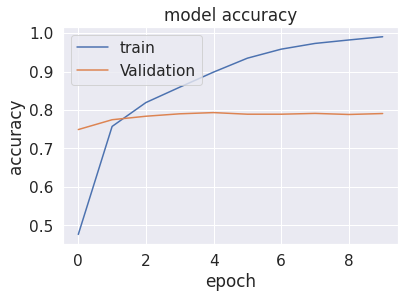

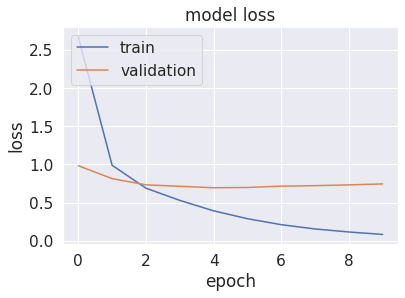

In [62]:
# list all data in history
print(model_info.history.keys())
# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
test_generator.reset()
score = new_model.evaluate_generator(test_generator, (test_generator.samples + (batch_size-1)) // batch_size)
print("For test data set; Loss: ",score[0]," Accuracy: ", score[1])

For test data set; Loss:  0.6982880234718323  Accuracy:  0.7935015559196472


In [64]:
test_generator.reset()

testStep = (test_generator.samples + (batch_size-1)) // batch_size
print("testStep: ", testStep)

testStep:  190


In [65]:
Y_pred = new_model.predict_generator(test_generator, steps=testStep, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print(str(len(y_pred)))
labels = (validation_generator.class_indices)
print("Labels "+(str)(labels))
labels = dict((v, k) for k, v in labels.items())
print(labels)
predictedLabels = [labels[k] for k in y_pred]
#print("Predicted Labels "+(str)(predictedLabels))
len(predictedLabels)
actualLabels = [labels[k] for k in test_generator.classes]
print("Actual Labels "+(str)(actualLabels))
len(actualLabels)

190/190 - 30s
[  0   0   0 ... 119  70 119]
6063
Labels {'Affenpinscher': 0, 'AfghanHound': 1, 'AfricanHuntingDog': 2, 'Airedale': 3, 'AmericanStaffordshireTerrier': 4, 'Appenzeller': 5, 'AustralianTerrier': 6, 'Basenji': 7, 'Basset': 8, 'Beagle': 9, 'BedlingtonTerrier': 10, 'BerneseMountainDog': 11, 'Black': 12, 'BlenheimSpaniel': 13, 'Bloodhound': 14, 'Bluetick': 15, 'BorderCollie': 16, 'BorderTerrier': 17, 'Borzoi': 18, 'BostonBull': 19, 'BouvierDesFlandres': 20, 'Boxer': 21, 'BrabanconGriffon': 22, 'Briard': 23, 'BrittanySpaniel': 24, 'BullMastiff': 25, 'Cairn': 26, 'Cardigan': 27, 'ChesapeakeBayRetriever': 28, 'Chihuahua': 29, 'Chow': 30, 'Clumber': 31, 'CockerSpaniel': 32, 'Collie': 33, 'Curly': 34, 'DandieDinmont': 35, 'Dhole': 36, 'Dingo': 37, 'Doberman': 38, 'EnglishFoxhound': 39, 'EnglishSetter': 40, 'EnglishSpringer': 41, 'Entlebucher': 42, 'EskimoDog': 43, 'Flat': 44, 'FrenchBulldog': 45, 'GermanShepherd': 46, 'GermanShort': 47, 'GiantSchnauzer': 48, 'GoldenRetriever': 49, 

6063

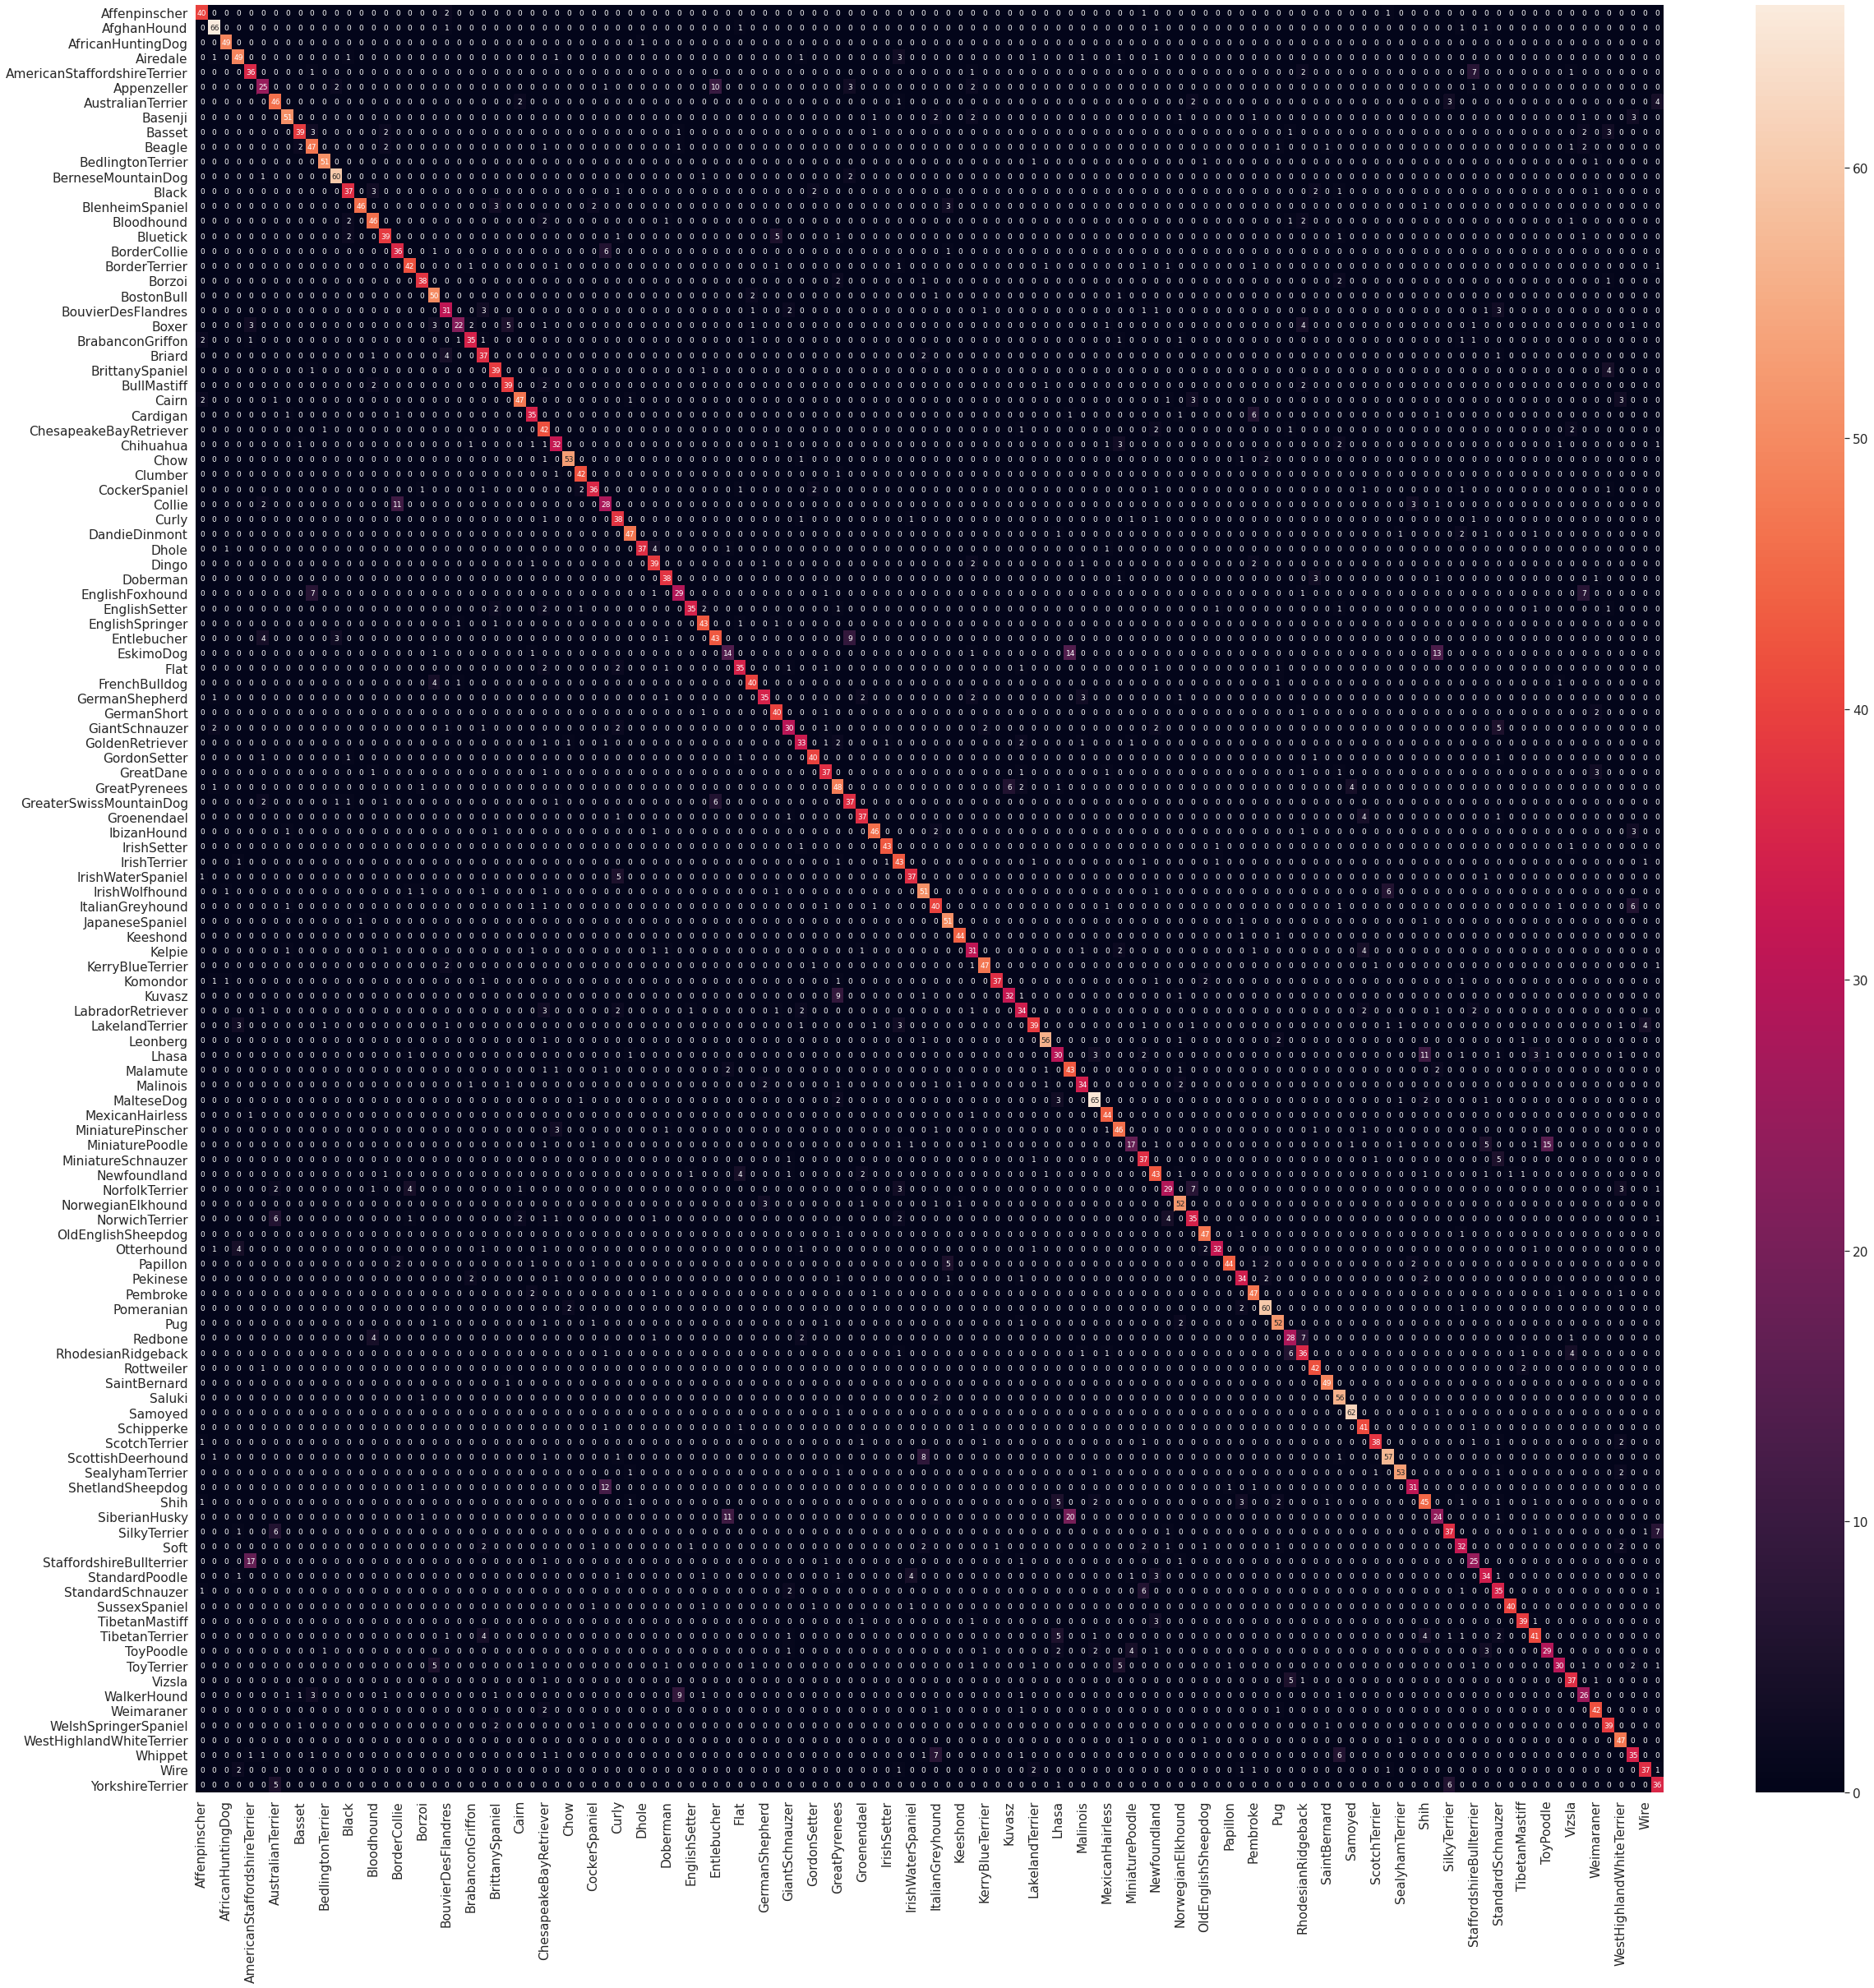

In [77]:
df_cm = pd.DataFrame(confusion_matrix(actualLabels, predictedLabels), main_categories, main_categories)
plt.figure(figsize=(40,40))
sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 9}) # font size
plt.show()

In [67]:
print(classification_report(actualLabels, predictedLabels))

                              precision    recall  f1-score   support

               Affenpinscher       0.83      0.91      0.87        44
                 AfghanHound       0.89      0.93      0.91        71
           AfricanHuntingDog       0.94      0.98      0.96        50
                    Airedale       0.80      0.82      0.81        60
AmericanStaffordshireTerrier       0.61      0.75      0.67        48
                 Appenzeller       0.66      0.57      0.61        44
           AustralianTerrier       0.70      0.79      0.74        58
                     Basenji       0.91      0.82      0.86        62
                      Basset       0.89      0.75      0.81        52
                      Beagle       0.75      0.81      0.78        58
           BedlingtonTerrier       0.94      0.94      0.94        54
          BerneseMountainDog       0.91      0.94      0.92        64
                       Black       0.84      0.79      0.81        47
             Blenhe